In [12]:
#for linear algebra 
import numpy as np

In [13]:
#for data preprocessing
import pandas as pd

In [14]:
#for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

**Import all the machine learning algorithms to be tested**

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

**Import the data**

In [16]:
df_train = pd.read_csv("/home/kundan/Desktop/train.csv")
df_test = pd.read_csv("/home/kundan/Desktop/test.csv")

**Data Exploratian and Analysis**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 examples and 11 features excluding the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. 



In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80.We can also detect some features, that contain missing values, like the ‘Age’ feature.


In [18]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

In [19]:
total = df_train.isnull().sum().sort_values(ascending=False)

In [20]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [21]:
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100

In [22]:
percent_1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [23]:
percent_2 = (round(percent_1,1)).sort_values(ascending=False)

In [24]:
percent_2

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

In [25]:
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])

In [26]:
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [27]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above we can see the 11 features + the target variable (survived). 

Everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

** 1. Age and Sex **

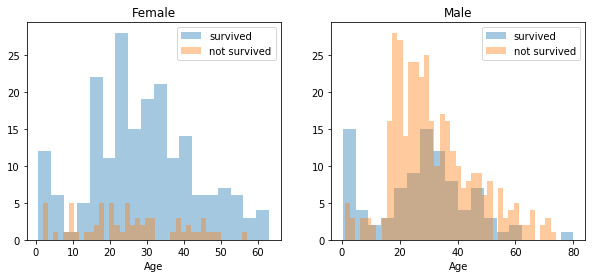

In [28]:
survived = 'survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women = df_train[df_train['Sex'] == 'female']
men = df_train[df_train['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax = axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because we want every feature to be roughly on the same scale, we will create age groups later on.

** 2. Embarked, PClass and Sex **

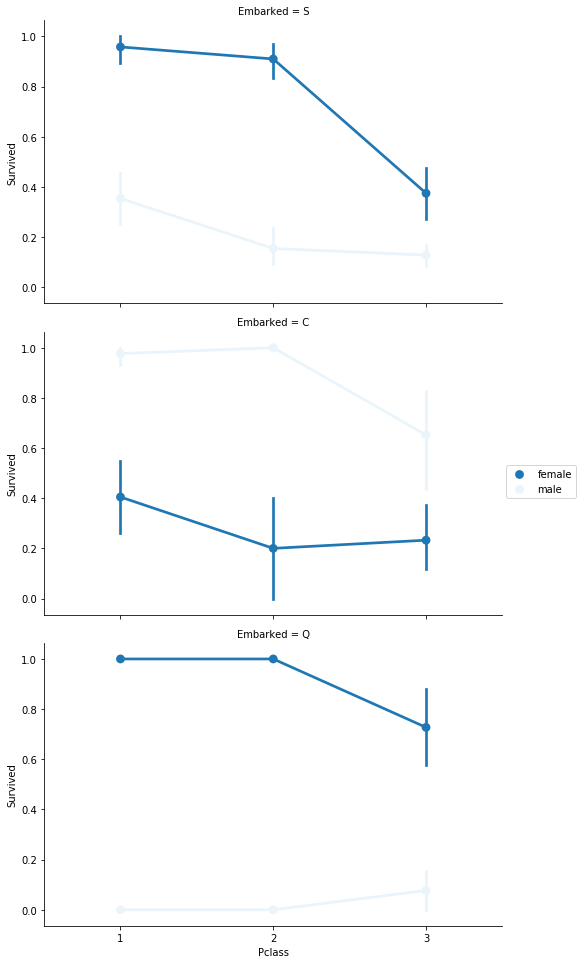

In [29]:
FacetGrid = sns.FacetGrid(df_train,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival.

** PClass**


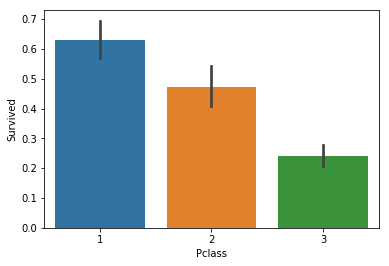

In [30]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. 

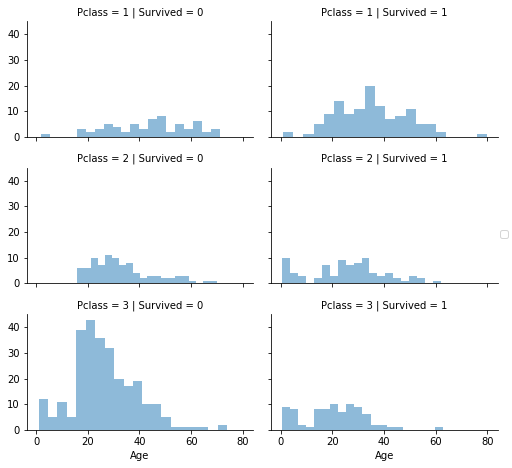

In [31]:
grid = sns.FacetGrid(df_train,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [32]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

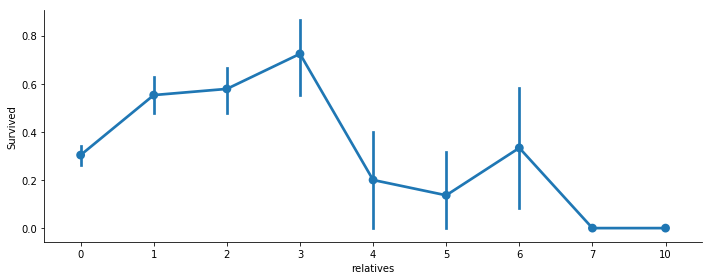

In [33]:
axes = sns.factorplot('relatives','Survived',data=df_train,aspect=2.5)

Here we can see that the passengers had a high probabilty of survival with 1 to 3 realitves, but a lower one if they had less than 1 or more than 3 (except for some cases with 6 relatives).

First, we will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

In [34]:
df_train = df_train.drop(['PassengerId'],axis=1)

** MISSING DATA **

Cabin:

We have to deal with Cabin (687), Embarked (2) and Age (177). A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these instead of deleting the cabin column and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [35]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

Age:

In [36]:
data = [df_train,df_test]
for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    #fill Nan Values
    age_full = dataset["Age"].copy()
    age_full[np.isnan(age_full)] = rand_age
    dataset["Age"] = age_full
    dataset["Age"] = df_train["Age"].astype(int)
    
df_train.isnull().sum()    

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     2
relatives    0
Deck         0
dtype: int64

Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [37]:
df_train["Embarked"].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [38]:
common_value = 'S'
data = [df_train,df_test]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)

**Converting Features**

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 83.6+ KB


Above we can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. We will transform them.

Fare:


In [40]:
data = [df_train,df_test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

** Name **


We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [41]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

Sex

Convert Sex feature into numeric

In [42]:
genders = {"male":0,"female":1}
data = [df_train,df_test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Ticket:

In [43]:
df_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [44]:
df_train = df_train.drop(['Ticket'],axis=1)
df_test = df_test.drop(['Ticket'],axis=1)

Embarked:

Convert ‘Embarked’ feature into numeric.

In [45]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories:**

We will now create categories within the following features:

Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. We should avoid placing for example more than 80 percent of data in one group.

In [46]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [47]:
df_train["Age"].value_counts()

4    178
6    160
5    142
3    129
2    122
1     92
0     68
Name: Age, dtype: int64

Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [48]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Title
0,0,3,0,2,1,0,7,0,1,8,1
1,1,1,1,5,1,0,71,1,1,3,3
2,1,3,1,3,0,0,7,0,0,8,2
3,1,1,1,5,1,0,53,0,1,3,3
4,0,3,0,5,0,0,8,0,0,8,1
5,0,3,0,3,0,0,8,2,0,8,1
6,0,1,0,6,0,0,51,0,0,5,1
7,0,3,0,0,3,1,21,0,4,8,4
8,1,3,1,3,0,2,11,0,2,8,3
9,1,2,1,1,1,0,30,1,1,8,3


In [49]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

**Creating new Features**

We will add two new features to the dataset, that we compute out of other features.

1. Age times Class

In [50]:
data = [df_train,df_test]
for dataset in data:
    dataset['Age_Class'] = dataset['Age']*dataset['Pclass']

 2 Fare per Person

In [51]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [52]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,8,1,6,0
1,1,1,1,5,1,0,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,3,0,1,3,3,5,1
4,0,3,0,5,0,0,1,0,0,8,1,15,1
5,0,3,0,3,0,0,1,2,0,8,1,9,1
6,0,1,0,6,0,0,3,0,0,5,1,6,3
7,0,3,0,0,3,1,2,0,4,8,4,0,0
8,1,3,1,3,0,2,1,0,2,8,3,9,0
9,1,2,1,1,1,0,2,1,1,8,3,2,1


**Building Machine Learning Models**

Now we will train several Machine Learning models and compare their results.

In [53]:
X_train = df_train.drop("Survived",axis=1)
Y_train = df_train["Survived"]
X_test = df_test.drop("PassengerId",axis=1).copy()

**Stochastic Gradient Descent (SGD):**

In [54]:
sgd = linear_model.SGDClassifier(max_iter=5,tol = None)
sgd.fit(X_train,Y_train)
Y_Pred=sgd.predict(X_test)
sgd.score(X_train,Y_train)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)

**Random Forest:**

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)

**Logistic Regression:**

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)

**K Nearest Neighbor:**

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)

**Gaussian Naive Bayes:**

In [58]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)

**Linear Support Vector Machine:**

In [59]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

**Decision Tree:**

In [60]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**Which is the best Model ?**

In [61]:
results = pd.DataFrame({'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest',
                                 'Naive Bayes','Stochastic Gradient Descent','Decision Tree'],'Score':[
    acc_linear_svc,acc_knn,acc_log,acc_random_forest,
acc_gaussian,acc_sgd,acc_decision_tree]})

In [62]:
df_results = results.sort_values(by='Score',ascending=False)

In [63]:
df_results = df_results.set_index('Score')
df_results.head(8)

,Model
Score,
92.37,Random Forest
92.37,Decision Tree
87.77,KNN
81.48,Support Vector Machines
81.37,Logistic Regression
79.80,Stochastic Gradient Descent
78.45,Naive Bayes


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

**K-Fold Cross Validation:**

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.


The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [64]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train,Y_train,cv=10,scoring="accuracy")
print("Scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

Scores: [ 0.74444444  0.82222222  0.76404494  0.86516854  0.87640449  0.80898876
  0.7752809   0.75280899  0.83146067  0.84090909]
Mean: 0.808173306095
Standard Deviation: 0.0445777074907


**Random Forest**

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when we are growing a tree in random forest, only a random subset of the features is considered for splitting a node. We can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

**Feature Importance**

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [65]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [66]:
importances.head(15)

,importance
feature,
Title,0.226
Sex,0.149
Age_Class,0.097
Deck,0.088
Pclass,0.074
Fare,0.072
Age,0.069
relatives,0.066
Embarked,0.050


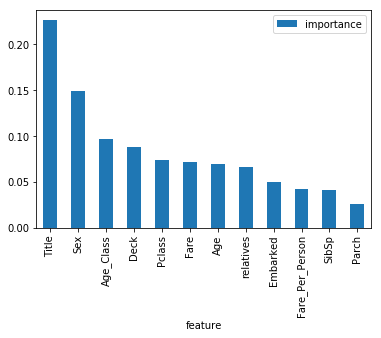

In [67]:
importances.plot.bar()

Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that we will drop them from the dataset and train the classifier again.

In [68]:
df_train = df_train.drop("Parch",axis=1)
df_test = df_test.drop("Parch",axis=1)

**Training random forest again:**

In [69]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.37 %


Hence the random forest predicts as good as it did before removing the Parch attribute. The more features we have its more likely that our model will suffer from **overfitting**.

**Further Evaluation:**

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest,X_train,Y_train,cv=3)
confusion_matrix(Y_train,predictions)

array([[485,  64],
       [ 98, 244]])

485 Passengers were correctly classified as not survived called as true negatives.
64 Passengers were incorrectly classified as not survived called as false negatives.
98 Passengers were incorrectly classified as survived called as false positives.
244 Passengers were correctly classified as survived called as true positives.

**Precision and Recall:**

In [72]:
from sklearn.metrics import precision_score,recall_score
print("Precision:",precision_score(Y_train,predictions))
print("Recall:",recall_score(Y_train,predictions))

Precision: 0.792207792208
Recall: 0.713450292398


Our model predicts 79% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 71% of the people who actually survived.

**Summary**

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 7 different machine learning models, picked one of them (random forest) and applied cross validation on it. Then we looked at how random forest works, took a look at the importance it assigns to the different features. Lastly, we looked at it’s confusion matrix and computed the models precision and recall.